# Visualizaing Filters and inner layer feature maps 

This notebook primarily follows the instructions from [machinelearningmastery](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/) you can check out the original blog.

Deep learning neural networks are generally opaque, meaning that although they can make useful and skillful predictions, it is not clear how or why a given prediction was made.

Convolutional neural networks, have internal structures that are designed to operate upon two-dimensional image data, and as such preserve the spatial relationships for what was learned by the model. Specifically, the two-dimensional filters learned by the model can be inspected and visualized to discover the types of features that the model will detect, and the activation maps output by convolutional layers can be inspected to understand exactly what features were detected for a given input image.


# Pre-fit Xception Model

You can find this model paper from [here](https://arxiv.org/abs/1610.02357).
Xception is an interpretation of Inception modules in convolutional neural networks as being an intermediate step in-between regular convolution and the depthwise separable convolution operation (a depthwise convolution followed by a pointwise convolution). 

In [ ]:
from keras.applications.xception import Xception

model = Xception()
model.summary()

91884032/91884032 [==============================] - 2s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

# How to Visuallize Filters


Feature Visualization translates the internal features present in an image into visually perceptible or recognizable image patterns. Feature visualization will help us understand the learned features explicitly.

## Plotting the learned features inside each layer

To this end, first we need to get the conv layers from the model. The ResNet architecture follows two basic design rules. First, the number of filters in each layer is the same depending on the size of the output feature map. Second, if the feature map’s size is halved, it has double the number of filters to maintain the time complexity of each layer. 

block2_sepconv1 (3, 3, 1536, 1)


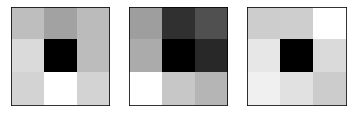

block2_sepconv2 (3, 3, 64, 1)


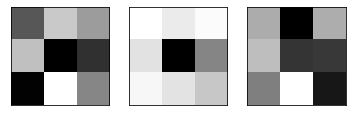

block3_sepconv1 (3, 3, 128, 1)


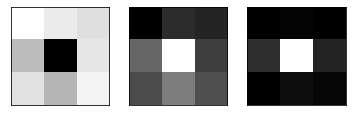

block3_sepconv2 (3, 3, 128, 1)


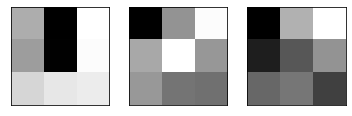

block4_sepconv1 (3, 3, 256, 1)


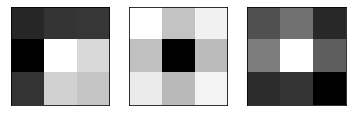

block4_sepconv2 (3, 3, 256, 1)


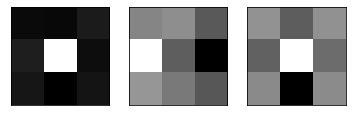

block5_sepconv1 (3, 3, 728, 1)


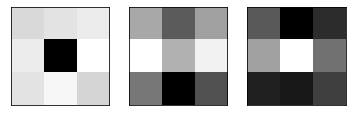

block5_sepconv2 (3, 3, 728, 1)


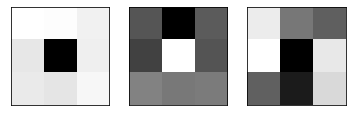

block5_sepconv3 (3, 3, 728, 1)


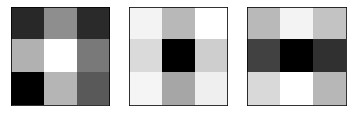

block6_sepconv1 (3, 3, 728, 1)


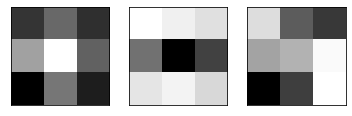

block6_sepconv2 (3, 3, 728, 1)


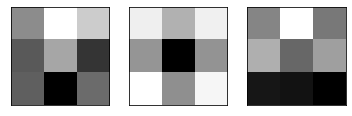

block6_sepconv3 (3, 3, 728, 1)


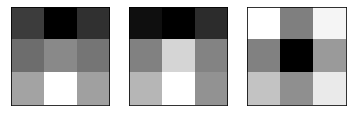

block7_sepconv1 (3, 3, 728, 1)


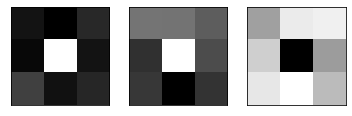

block7_sepconv2 (3, 3, 728, 1)


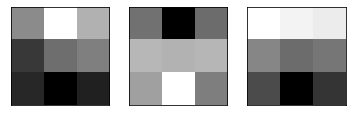

block7_sepconv3 (3, 3, 728, 1)


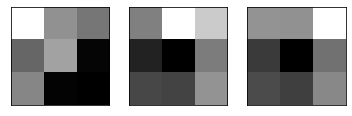

block8_sepconv1 (3, 3, 728, 1)


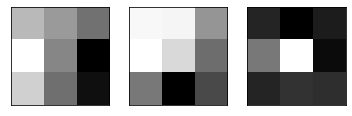

block8_sepconv2 (3, 3, 728, 1)


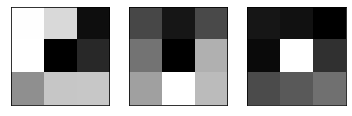

block8_sepconv3 (3, 3, 728, 1)


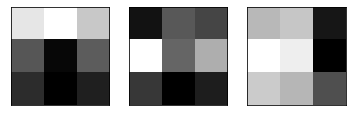

block9_sepconv1 (3, 3, 728, 1)


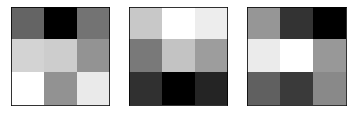

block9_sepconv2 (3, 3, 728, 1)


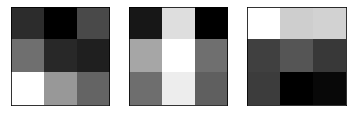

block9_sepconv3 (3, 3, 728, 1)


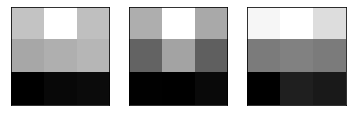

block10_sepconv1 (3, 3, 728, 1)


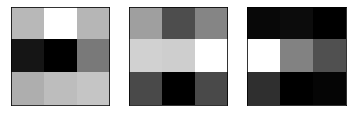

block10_sepconv2 (3, 3, 728, 1)


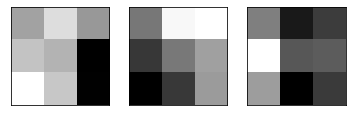

block10_sepconv3 (3, 3, 728, 1)


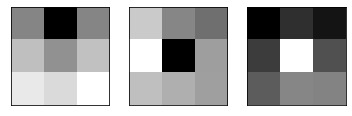

block11_sepconv1 (3, 3, 728, 1)


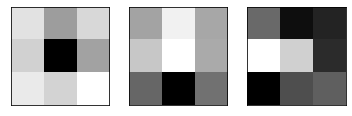

block11_sepconv2 (3, 3, 728, 1)


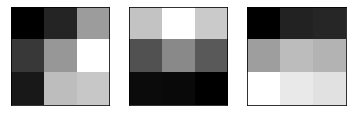

block11_sepconv3 (3, 3, 728, 1)


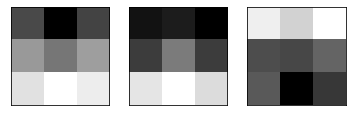

block12_sepconv1 (3, 3, 728, 1)


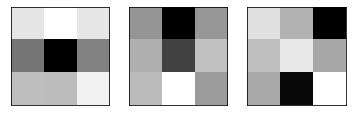

block12_sepconv2 (3, 3, 728, 1)


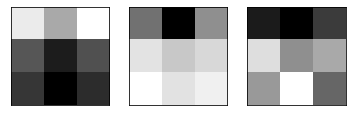

block12_sepconv3 (3, 3, 728, 1)


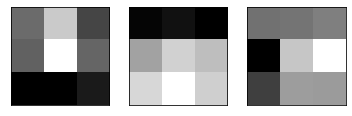

block13_sepconv1 (3, 3, 728, 1)


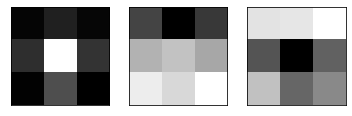

block13_sepconv2 (3, 3, 728, 1)


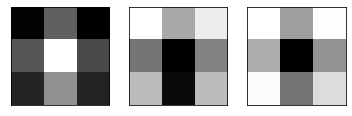

block14_sepconv1 (3, 3, 728, 1)


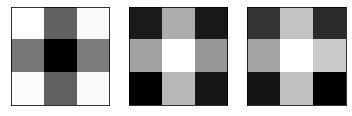

block14_sepconv2 (3, 3, 1024, 1)


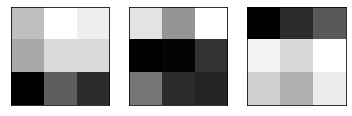

In [ ]:
import matplotlib.pyplot as plt

for layer in model.layers:
  if 'conv' not in layer.name:
    # print(layer.name)
    continue
  try:
    # print(layer.name)
    weights, biases = layer.get_weights()
    print(layer.name, filters.shape)

    f_min, f_max = weights.min(), weights.max()
    filters = (weights - f_min) / (f_max - f_min)
    # print(filters.shape[3])
    filter_cnt = 1

    for i in range(filters.shape[3]):
      filt = filters[:, :, :, i]
      # print(filt.shape, filters.shape[0], filters.shape[3])
      for j in range(filters.shape[0]):
        ax = plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt[:, :, j], cmap='gray')
        filter_cnt += 1

    plt.show()
    
  except Exception as e:
    pass

As you can see from the above image, one thing we can conclude is on the first layers, filters try to generally investigate more pixels in each slide, (The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights) but as we go deeper, filters try to focus on some part of inputs. Moreover, as we go deeper into the model, filters become more complex than the first layers. 

# How to Visualize Feature Maps

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features (As we explore the filters in previous part, we observed this fact but in this stage, we are going to investigate it on a real picture).

## Imports

In [ ]:
from keras.applications.xception import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

## Download an image for visualizing feqture maps

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
img_url = 'https://machinelearningmastery.com/wp-content/uploads/2019/02/bird.jpg'
response = requests.get(img_url)
if response.status_code:
    fp = open('bird.jpg', 'wb')
    fp.write(response.content)
    fp.close()

## Preprocessing Image

In [ ]:
img = load_img('bird.jpg', target_size=(299, 299))

In [ ]:
# convert the image to an array
img = img_to_array(img)

In [ ]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [ ]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

## Getting an insight about model architecture

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(model.layers)):
  layer = model.layers[i]
  if 'conv' not in layer.name:
    # print(layer.name)
    continue
  try:
    # print(layer.name)
    # weights, biases = layer.get_weights()
    print(i, layer.name, layer.output.shape)
  except Exception as e:
    pass

1 block1_conv1 (None, 149, 149, 32)
2 block1_conv1_bn (None, 149, 149, 32)
3 block1_conv1_act (None, 149, 149, 32)
4 block1_conv2 (None, 147, 147, 64)
5 block1_conv2_bn (None, 147, 147, 64)
6 block1_conv2_act (None, 147, 147, 64)
7 block2_sepconv1 (None, 147, 147, 128)
8 block2_sepconv1_bn (None, 147, 147, 128)
9 block2_sepconv2_act (None, 147, 147, 128)
10 block2_sepconv2 (None, 147, 147, 128)
11 block2_sepconv2_bn (None, 147, 147, 128)
12 conv2d (None, 74, 74, 128)
16 block3_sepconv1_act (None, 74, 74, 128)
17 block3_sepconv1 (None, 74, 74, 256)
18 block3_sepconv1_bn (None, 74, 74, 256)
19 block3_sepconv2_act (None, 74, 74, 256)
20 block3_sepconv2 (None, 74, 74, 256)
21 block3_sepconv2_bn (None, 74, 74, 256)
22 conv2d_1 (None, 37, 37, 256)
26 block4_sepconv1_act (None, 37, 37, 256)
27 block4_sepconv1 (None, 37, 37, 728)
28 block4_sepconv1_bn (None, 37, 37, 728)
29 block4_sepconv2_act (None, 37, 37, 728)
30 block4_sepconv2 (None, 37, 37, 728)
31 block4_sepconv2_bn (None, 37, 37, 728)


## Visualization

In [ ]:
from keras.applications.xception import Xception

model = Xception()

In [ ]:
ixs = [1, 4, 12, 22, 32, 53, 90, 122]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs = outputs)

feature_maps = model.predict(img)

1/1 [==============================] - 1s 1s/step


---------------------------


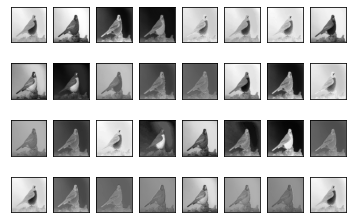

---------------------------


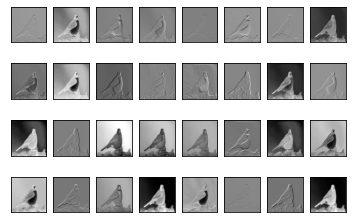

---------------------------


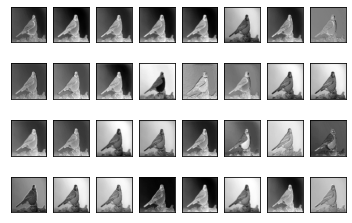

---------------------------


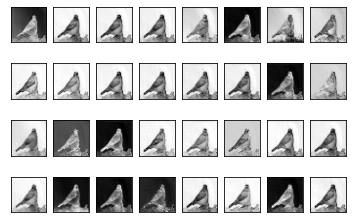

---------------------------


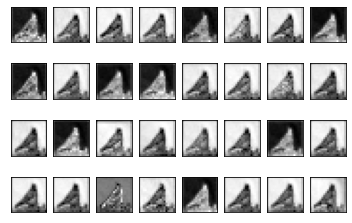

---------------------------


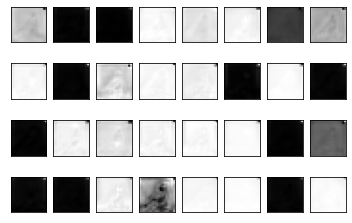

---------------------------


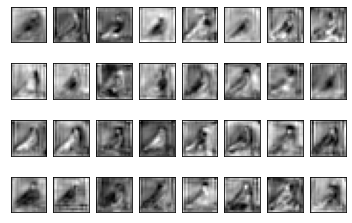

---------------------------


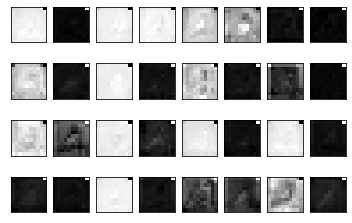

In [ ]:
sub_row, sub_col = 4, 8

for fmap in feature_maps:
  ix = 1
  print('---------------------------')
  for _ in range(sub_row):
    for _ in range(sub_col):
      ax = plt.subplot(sub_row, sub_col, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
  plt.show()

From the result, we can figure out that feature maps from the first layers capture a lot of fine details in the image, and as we progress deeper into the model, the feature maps show less and less details. The model abstracts the feature from the image into more general information that can be used for differet tasks, i.e. Classification or segmentation.